In [2]:
import time
import random
from math import *
import operator
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# import the ML algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from statsmodels.tools.eval_measures import rmse
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

# pre-processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer
#from sklearn.preprocessing import Imputer


# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut 

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report

In [3]:
location = r"E:\Python\Machine Learning\datasets\iris.csv"

In [4]:
# load the training data from iris.txt
df_training = pd.read_csv(location )
df_training.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
# copy the predictor variables into X and responses in y
X = df_training[['sepal_length','sepal_width', 'petal_length', 'petal_width']]
y = df_training['class']

In [10]:
# split the data into training and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

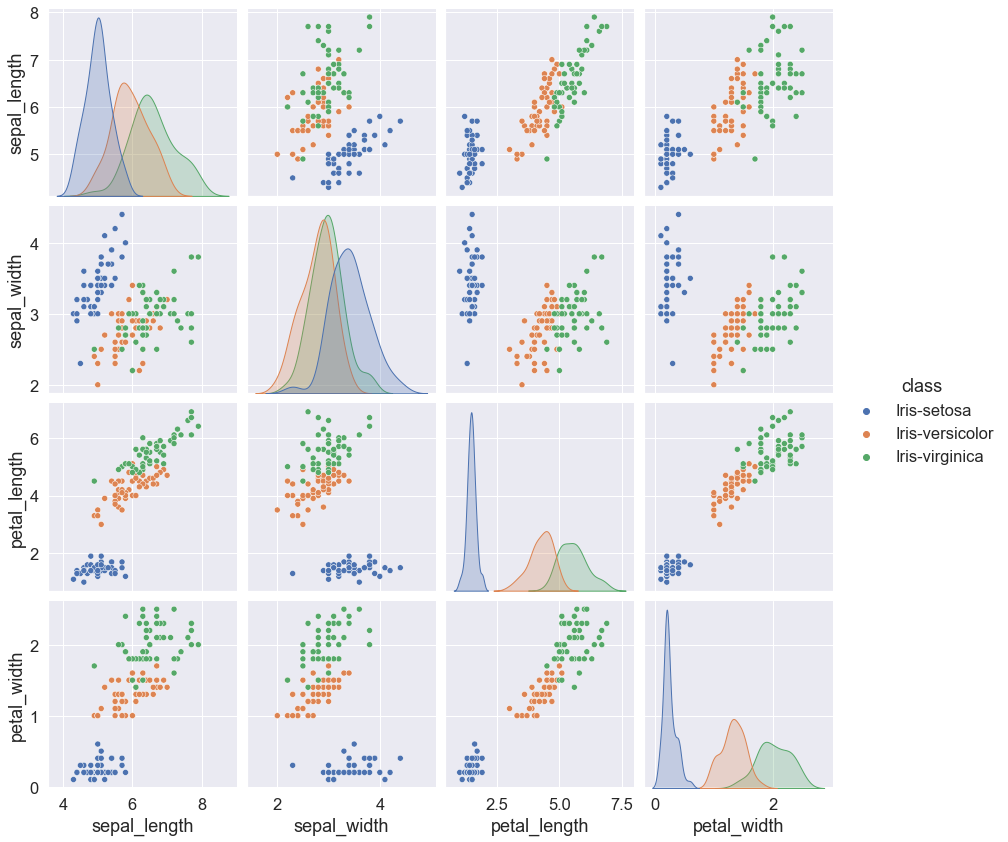

In [6]:
# scatter plot
# From the plot, we can see that the species setosa is separataed from the other two across all feature combinations
#sns.pairplot(data=df_training, hue='class', size=3);
sns.pairplot(data=df_training, hue='class', height=3);

<AxesSubplot:>

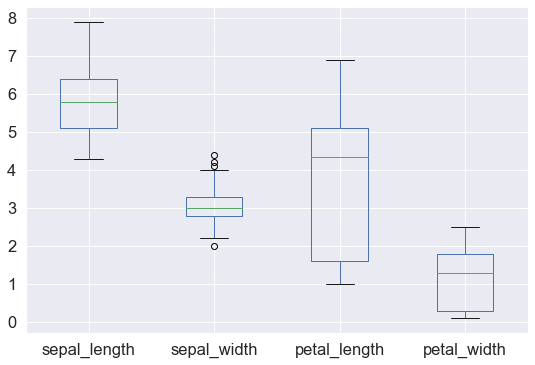

In [16]:
df_training.plot(kind='box', figsize=(9,6), grid=True)

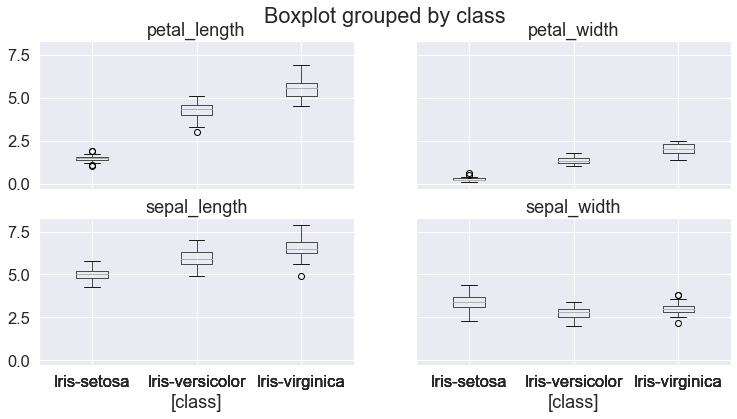

In [18]:
df_training.boxplot(by="class",figsize=(12,6));

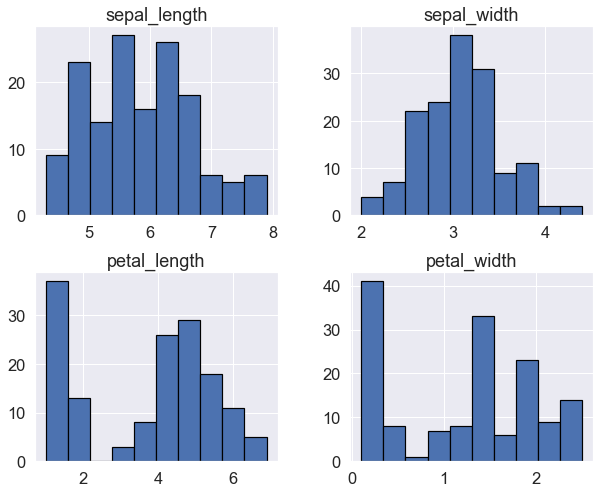

In [22]:
#df_training.hist(edgecolor='black', sharex= True, linewidth=1.2, figsize=(10, 8));
df_training.hist(edgecolor='black', linewidth=1.2, figsize=(10, 8));

In [11]:
# instantiate the classifier

gnb = GaussianNB()
mnb = MultinomialNB()

In [12]:
# Gaussian NB
# fit the training data
fit_gnb = gnb.fit(X_train, y_train)

In [13]:
# making predictions on the testing set
y_pred_gnb = fit_gnb.predict(X_test)

In [14]:
y_pred_gnb

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa'], dtype='<U15')

In [15]:
from sklearn.metrics import confusion_matrix

cnf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)
cnf_matrix_gnb

array([[16,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 11]], dtype=int64)

In [16]:
# comparing actual response values (y_test) with predicted response values (y_pred)
print("model accuracy:", metrics.accuracy_score(y_test, y_pred_gnb)* 100)

model accuracy: 100.0


In [17]:
print ('Report : ', classification_report(y_test, y_pred_gnb))

Report :                   precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [18]:
# making prediction for out of sample data
sample = [[3, 5, 4, 2], [2, 3, 5, 4]]
preds = fit_gnb.predict(sample)
preds

array(['Iris-virginica', 'Iris-virginica'], dtype='<U15')

In [19]:
# Multinomial NB

# fit the training data
fit_mnb = mnb.fit(X_train, y_train)

In [20]:
# making predictions on the testing set
y_pred_mnb = fit_mnb.predict(X_test)

In [21]:
cnf_matrix_mnb = confusion_matrix(y_test, y_pred_gnb)
cnf_matrix_mnb

array([[16,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 11]], dtype=int64)

In [22]:
# comparing actual response values (y_test) with predicted response values (y_pred)
print("model accuracy:", metrics.accuracy_score(y_test, y_pred_gnb)* 100)


model accuracy: 100.0


In [23]:
print ('Report : ', classification_report(y_test, y_pred_gnb))

Report :                   precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [24]:
# calculating other evaluation metrics
cnf_matrix_mnb

array([[16,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 11]], dtype=int64)

In [26]:
type(cnf_matrix_mnb)

numpy.ndarray

In [29]:
print("TP and TN")
print("---------")
print(cnf_matrix_mnb[0][0])
print(cnf_matrix_mnb[1][1])
print(cnf_matrix_mnb[2][2])

TP and TN
---------
16
18
11
